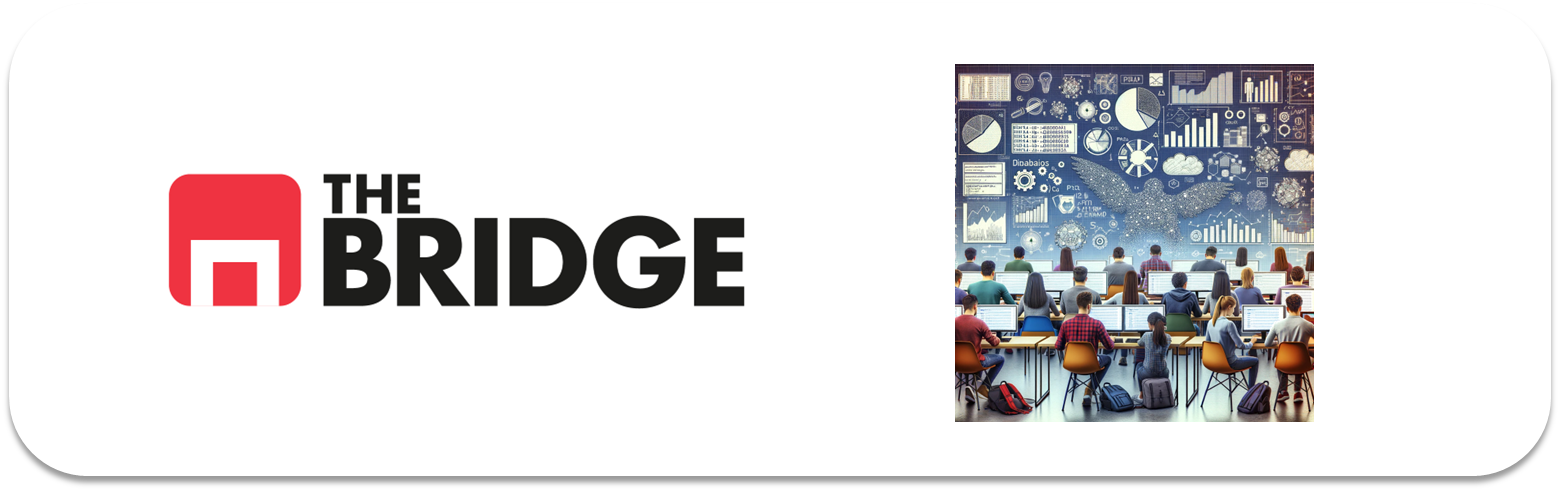

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [26]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge ,Lasso
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_casas=pd.read_csv("./data/hard_to_find/obligatoria_hard.csv",sep="|")
df_casas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


<Axes: xlabel='MEDV', ylabel='Count'>

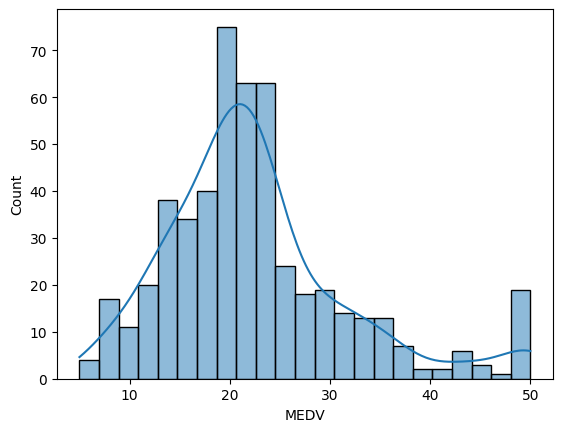

In [5]:
target= "MEDV"
sns.histplot(df_casas[target],kde=True)

In [ ]:
#Forma de campana de gauss con pequeño pero considerable repunte de outliers alrededor de 50.000 dolares
#Distribución idonea para regresion lineal

In [6]:
X= df_casas.drop(columns=target)
y= df_casas[target]

In [7]:
X_train,X_test,y_train,y_test= model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 12)
(404, 12)
(102, 12)
(404,)
(102,)


In [13]:
train_set=pd.concat([X_train,y_train],axis=1)
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,24.91,12.0
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,8.47,19.9
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,7.83,19.4
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,23.29,13.4
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,18.66,19.5
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,13.00,21.1
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,5.99,24.5
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,23.27,13.4


In [14]:
train_set.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,0.414142,-0.380091
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,-0.396572,0.309504
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,0.603644,-0.470546
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,-0.070652,0.190642
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,0.593862,-0.415768
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,-0.612577,0.710680
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,0.571051,-0.340216
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,-0.494921,0.235114
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,0.480301,-0.387467
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,0.530632,-0.459795


<Axes: >

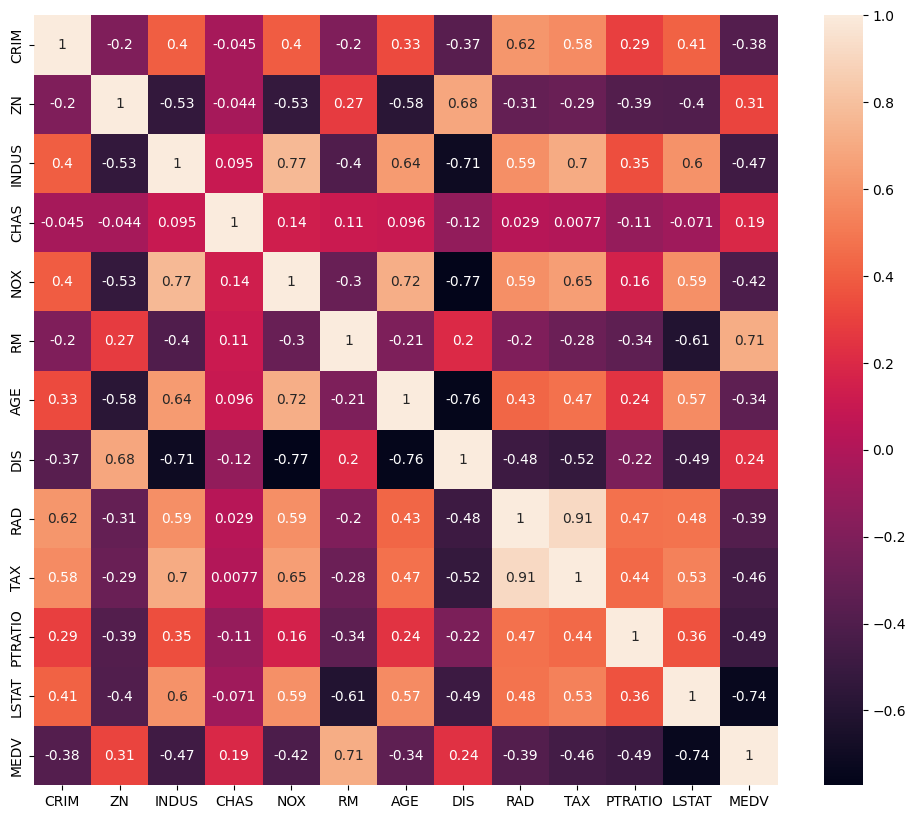

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_set.corr(),annot=True)

In [ ]:
# VOY A COGER FEATURES CON UNA CORRELACION MINIMA DE 0,35 YA SEA POSITIVA O NEGATIVA

***CRIM:*** Tasa de criminalidad per cápita por ciudad   ///   (FEATURE ALGO RELEVANTE RELACION NEGATIVA)  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados   ///    (---DESCARTADA---)  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  ///     (FEATURE ALGO RELEVANTE RELACION NEGATIVA)  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)    ///     (---DESCARTADA---)   
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)    ///    (FEATURE ALGO RELEVANTE RELACION NEGATIVA)   
***RM:*** Número promedio de habitaciones por vivienda  ///    (FEATURE MUY RELEVANTE RELACION POSITIVA)   
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940    ///     (FEATURE ALGO RELEVANTE RELACION NEGATIVA)  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston   ///     (---DESCARTADA---)   
***RAD:*** Índice de accesibilidad a autopistas radiales   ///  (FEATURE ALGO RELEVANTE RELACION NEGATIVA) (NO ENTIENDO PQ SERÍA NEGATIVO ESTAR RELATIVAMENTE CERCA DE LA AUTOPISTA, QUIZA EL RUIDO)  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000   ///    (FEATURE ALGO RELEVANTE RELACION NEGATIVA)  
***PTRATIO:*** Relación alumno-maestro por ciudad    ///   (FEATURE ALGO RELEVANTE RELACION NEGATIVA)                                                             
***LSTAT:*** % de población de estatus socioeconómico bajo  ///    (FEATURE MUY RELEVANTE RELACION NEGATIVA)                                                   
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares   ///   (TARGET)                    

In [ ]:
# Viendo que la mayoria de los parametros tienen una relacion negativa con el precio, mi teoria es que el termino independiente será un precio muy alto 
# y los parametros irán restandole valor, excepto RM

In [22]:
X_train= X_train.drop(columns=["ZN","CHAS","DIS"])
X_test= X_test.drop(columns=["ZN","CHAS","DIS"])

print(X_train.columns)
X_test.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [24]:
features_num=X_train.columns.to_list()
features_num #Aqui guardo mis features

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

In [25]:
X_train.describe()

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,10.985050,0.556484,6.315891,68.556436,9.356436,404.032178,18.318317,12.457351
std,8.875058,6.894618,0.117704,0.709452,27.994922,8.589721,166.172655,2.228701,7.110381
min,0.009060,0.740000,0.385000,3.863000,2.900000,1.000000,187.000000,12.600000,1.730000
25%,0.081437,5.130000,0.452000,5.890500,45.550000,4.000000,279.000000,16.800000,6.772500
50%,0.261390,8.560000,0.538000,6.210000,77.700000,5.000000,330.000000,18.700000,10.925000
75%,3.202962,18.100000,0.631000,6.636750,93.650000,12.000000,666.000000,20.200000,16.372500
max,88.976200,27.740000,0.871000,8.780000,100.000000,24.000000,711.000000,22.000000,37.970000


In [ ]:
#Creo que ahora debería proceder a logaritmizar, minmaxscalear y Standarizar variables pero no se bien en base a que criterio realizar una cosa u otra sobre las variables 
# o si debo hacer un mismo proceso siempre a todas, de momento las dejo asi y procedo a hacer el modelo de regresión lineal.

In [ ]:
# Si en la corrección hacemos transformaciones introducirlas aqui y mantener los nombres de las variables para que todo siga funcionando

In [27]:
# Entrenamiento del modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
lin_reg.intercept_

np.float64(23.053709287611916)

In [30]:
lin_reg.coef_
coef_df = pd.DataFrame(lin_reg.coef_, X_train.columns, 
                      columns=['Coeficientes'])
coef_df

,Coeficientes
CRIM,-0.112351
INDUS,0.135591
NOX,-8.915978
RM,4.642770
AGE,0.031643
RAD,0.261757
TAX,-0.012627
PTRATIO,-0.988247
LSTAT,-0.571266


In [ ]:
# Mi teoria no es correcta, existen mas coeficientes positivos de lo que yo había entendido a partir de las correlaciones.

In [33]:
#Procedo a hacer predicciones y evaluar estas frente a los datos reales del target
original_predicciones_train=lin_reg.predict(X_train)
original_predicciones_test=lin_reg.predict(X_test)

In [41]:
def evalua(nombre_modelo, modelo, predicciones_train, predicciones_test):

    print(f"EVALUACION MODELO {nombre_modelo}")

    #Error del modelo en relacion a los datos de entrenamiento
    print("---EVALUACION DATOS ENTRENAMIENTO---")
    print('MAE train', metrics.mean_absolute_error(y_train, predicciones_train))
    print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, predicciones_train)))
    print('R2 train', modelo.score(X_train,y_train))

    #Error del modelo en relacion a los datos de test
    print("---EVALUACION DATOS TEST---")
    print('MAE test', metrics.mean_absolute_error(y_test, predicciones_test))
    print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predicciones_test)))
    print('R2 test', modelo.score(X_test,y_test))

    #Representacion Grafica
    sns.scatterplot(x=predicciones_test,y=y_test)
    plt.xlabel('predicciones', fontsize=14)
    plt.ylabel('valores reales', fontsize=14)
    plt.title(f"Representación de accuracy del modelo {nombre_modelo}", fontsize=14)

EVALUACION MODELO Regresion Lineal original
---EVALUACION DATOS ENTRENAMIENTO---
MAE train 3.6047164399256406
RMSE train 5.060061507692094
R2 train 0.7052697220099761
---EVALUACION DATOS TEST---
MAE test 3.2092030291756517
RMSE test 5.058180952149093
R2 test 0.6511131235552197


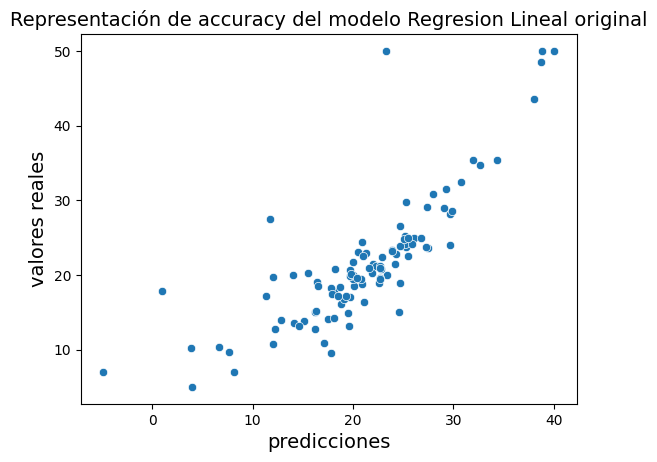

In [42]:
evalua("Regresion Lineal original", lin_reg,original_predicciones_train,original_predicciones_test)

In [ ]:
# El modelo original de regresion lineal esta bastante bien tiene una evaluacion en la generalizacion semejante a la de entrenamiento
# Veamos ahora que tal funciona tras diferentes regularizaciones

In [ ]:
# Voy a probar las regularizaciones Ridge y Lasso porque puedo hacer una funcion con ellas facilmente

In [46]:
def prueba_regularizacion(nombre_modelo_regularizado,ridge_o_lasso,alpha_elegido):

    if ridge_o_lasso==Ridge or ridge_o_lasso==Lasso:
        modelo_regularizado= ridge_o_lasso(alpha= alpha_elegido)
        modelo_regularizado.fit(X_train,y_train)

        funcion_predicciones_train=modelo_regularizado.predict(X_train)
        funcion_predicciones_test=modelo_regularizado.predict(X_test)

        evalua(nombre_modelo_regularizado,modelo_regularizado,funcion_predicciones_train,funcion_predicciones_test)
    
    else:
        print("Debe elegir una regularizacion valida: Lasso o Ridge")

EVALUACION MODELO Ridge alpha0.2
---EVALUACION DATOS ENTRENAMIENTO---
MAE train 3.603741617341131
RMSE train 5.060481900501057
R2 train 0.7052207472549431
---EVALUACION DATOS TEST---
MAE test 3.2048834389542753
RMSE test 5.063607779962598
R2 test 0.6503640935414026


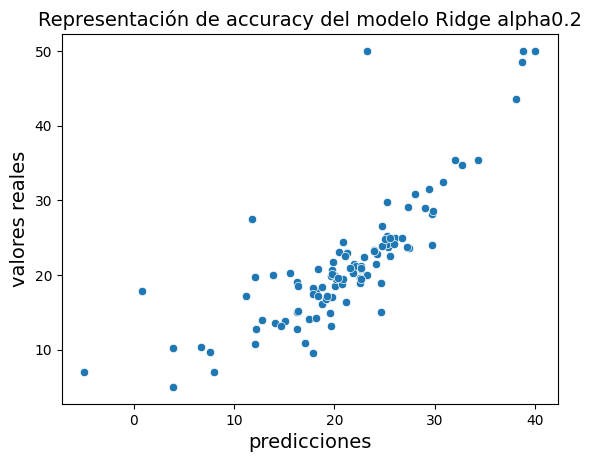

In [49]:
prueba_regularizacion("Ridge alpha0.2",Ridge,0.2)

EVALUACION MODELO Ridge alpha10
---EVALUACION DATOS ENTRENAMIENTO---
MAE train 3.630596526207249
RMSE train 5.0851437436861575
R2 train 0.7023405812016733
---EVALUACION DATOS TEST---
MAE test 3.1825464423550027
RMSE test 5.075188924372511
R2 test 0.6487629369705087


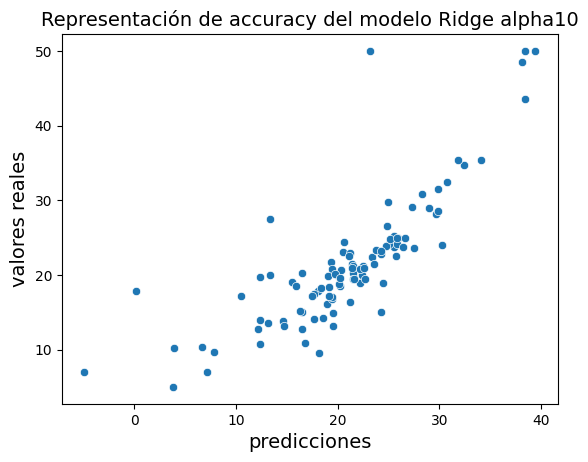

In [47]:
prueba_regularizacion("Ridge alpha10",Ridge,10)

EVALUACION MODELO Ridge alpha100
---EVALUACION DATOS ENTRENAMIENTO---
MAE train 3.784350517583081
RMSE train 5.214401269778885
R2 train 0.6870160555173681
---EVALUACION DATOS TEST---
MAE test 3.2299658968070126
RMSE test 4.983875092752443
R2 test 0.6612882921114963


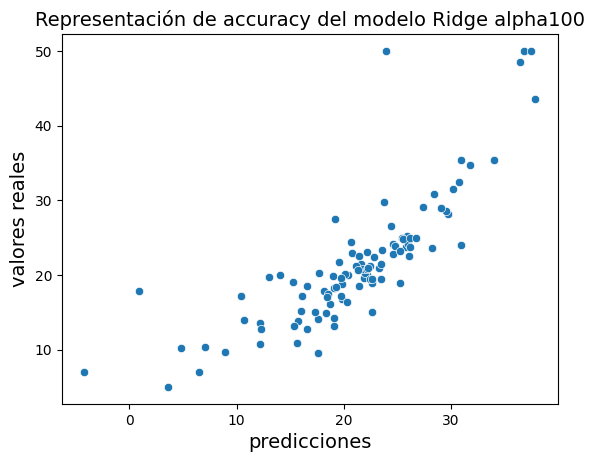

In [48]:
prueba_regularizacion("Ridge alpha100",Ridge,100)

EVALUACION MODELO Lasso alpha0.2
---EVALUACION DATOS ENTRENAMIENTO---
MAE train 3.643498081090922
RMSE train 5.100741220642697
R2 train 0.7005117809129385
---EVALUACION DATOS TEST---
MAE test 3.189043477415774
RMSE test 5.069314928527658
R2 test 0.6495755061700244


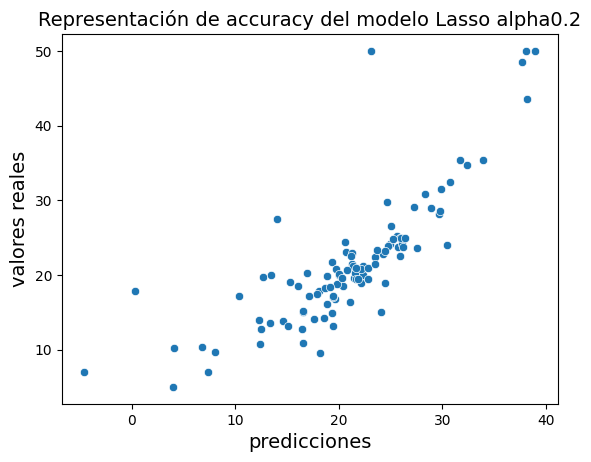

In [50]:
prueba_regularizacion("Lasso alpha0.2",Lasso,0.2)

EVALUACION MODELO Lasso alpha10
---EVALUACION DATOS ENTRENAMIENTO---
MAE train 4.588530336709363
RMSE train 6.467171377327282
R2 train 0.5185602983377731
---EVALUACION DATOS TEST---
MAE test 4.011274078067861
RMSE test 5.831379498502441
R2 test 0.5362984781350693


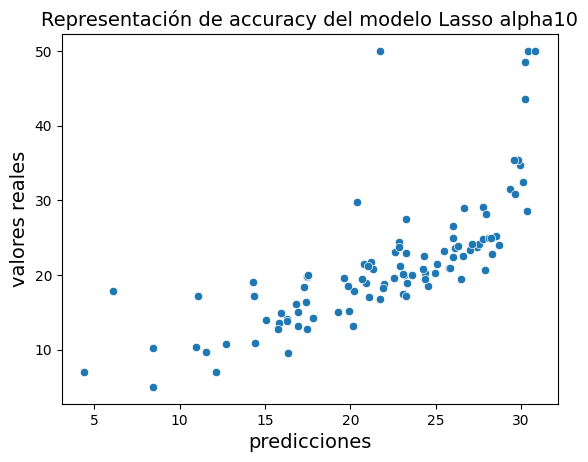

In [51]:
prueba_regularizacion("Lasso alpha10",Lasso,10)

EVALUACION MODELO Lasso alpha100
---EVALUACION DATOS ENTRENAMIENTO---
MAE train 6.081209574246529
RMSE train 8.298821095923772
R2 train 0.20723226507188197
---EVALUACION DATOS TEST---
MAE test 5.2961337984859185
RMSE test 7.471227705679896
R2 test 0.2388331676808988


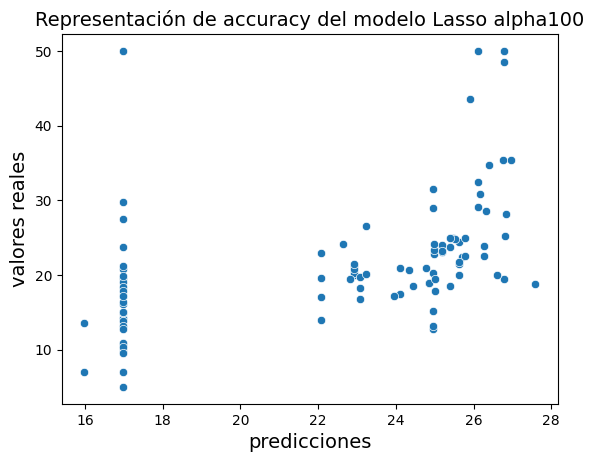

In [52]:
prueba_regularizacion("Lasso alpha100",Lasso,100)

In [ ]:
#ME QUEDARÍA CON EL MODELO Ridge alpha100 POR QUE MANEJA LOS MEJORES VALORES ENTRE SUS METRICAS CONJUNTAS.